# N5. K-Means improvement.
### Alberto Vargas.
------------------------

**Content.**
- Assessment description.
- Solution.
    - Libraries.
    - Data gathering.
    - Functions for modelling.
    - Functions for intrinsic & extrinsic cluster metrics.
    - K-Means.
    - Modified K-Means.
    - Results.
    - Conclusions.



### Assessment description. 
<details><summary> Click to Expand.</summary>
<p>

El objetivo de este trabajo es encontrar y estudiar una versión mejorada de alguno de los algoritmos estudiados en clase. Una vez seleccionado, se estudiará esa nueva versión del algoritmo y se compararán ambos (el original y la versión mejorada).

Para llevar a cabo esta actividad, se deberá elegir uno de los métodos estudiados en clase. Se buscará en la literatura científica relacionada un artículo que proponga una mejora al método seleccionado. La mejora puede ser, por ejemplo, una mejor inicialización del algoritmo, la supresión-sustitución de un parámetro, etc. Una vez elegido un algoritmo y encontrado un artículo que proponga una mejora para el mismo, se deberán programar ambos algoritmos (el básico y la versión mejorada).

- Se analizarán los resultados y se prestará atención a la contribución de la mejora del algoritmo extendido. ¿Se aprecia en los resultados la mejora que defienden los autores en el artículo estudiado? Se elaborará un informe documentando todo el proceso y con un análisis exhaustivo de los resultados.
-  Se compararán los resultados de ambos algoritmos en al menos 2 datasets a elegir, calculando métricas extrínsecas (en uno de ellos) e intrínsecas. 

</p>
</details>

### Solution. Content & Approach.
<details><summary> Click to Expand.</summary>
<p>
- Dynamic Clustering of Data with Modified K-Means Algorithm.

- Author: Ahamed Shafeeq. Manipal International University.
- Based in this repository => https://github.com/keenza/Modified-kmeans-Python

#### Index.
- Libraries.
- Data gathering.
- Functions for modelling.
- Functions for intrinsic & extrinsic cluster metrics.
- K-Means.
- Modified K-Means.
- Results.
- Conclusions.

------------------------------

#### Methodology.

Let's:
- Iterate over a dictionary of datasets.
- Preview some of their features.
- Display a random initialization of centers.
- Use the Elbow Method to check the best number of clusters, for a regular k-means.
- Compare that result with the obtained applying a modified k-means. The modified one is not working with the result of the Elbow Method.

The comparison will consist on:
- Visual results.
- Number of used clusters.
- Intrinsic metrics: Completeness Score, Adjusted Mutual Info, Homogeneity.
- Extrinsic metrics: Inter cluster distance, Intra cluster distance, silhouette.

-----------------------------------------------
------------------------------------------------
    
</p>
</details>

---------------------

# Assessment.

--------------------

### Libraries

In [1]:
%matplotlib inline

import itertools as it

import math
import numpy as np
import pandas as pd

# full list: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster*
# most common examples: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation
from sklearn.metrics import cluster
from copy import deepcopy
from sklearn.datasets import load_iris , load_wine, load_breast_cancer

from matplotlib import pyplot as plt

from sklearn.cluster import KMeans # I'll use it to create a function with the elbow  method
from kneed import KneeLocator

### Loading data.

In [2]:
datasets = {
  'iris': load_iris(),
  'wine': load_wine()
    }

### Functions.

- I should have written all the functions below in a separated .py script and importing all. Apologies in advance.

In [3]:
def dist(a, b, ax=1):
    '''Euclidean distance'''
    return np.linalg.norm(a - b, axis=ax)

def generation_center_clusters(k,c,n,X):
    '''Function to randomly generate centers.''' 
    C = np.random.randn(k,c)
    for i in range(k):
        C[i]=X[np.random.randint(0,n-1)]
    return(C)

def initialisation_old_new_centers(C):
    '''To store the values of the centers that they are modified''' 
    C_old = np.zeros(C.shape)
    return(C_old)

def distance_between_centers(C,X,clusters):
    '''Measuring distance between new and old centers'''
    C_old=initialisation_old_new_centers(C)
    error = dist(C, C_old, None)
    # Loop until the errors become 0
    while error != 0:
        # Assign each value to the class closest to it
        for i in range(len(X)):
            distances = dist(X[i], C)
            cluster = np.argmin(distances)
            clusters[i] = cluster
        # Store the old value of centers 
        C_old = deepcopy(C)
        # Find the new center based on the average 
        for i in range(k):
            points = [X[j] for j in range(len(X)) if clusters[j] == i]
            C[i] = np.mean(points, axis=0)
        error = dist(C, C_old, None)
    return C,clusters

def initialisation_intra_inter_distance(X):
    '''Modified k-means. Initialisation of inter and intra cluster distance.'''
    # Size of the matrix that contains the data values 
    c = X.shape[1] #X.shape[1]
    n = X.shape[0] # X.shape[0]
    old_intra_cluster_distance=0
    new_intra_cluster_distance = deepcopy(old_intra_cluster_distance)

    max1=0
    max2=0

    distances = np.zeros((n,n))
    for i in range(n):
        distances[:,i] = np.linalg.norm(X - X[i], axis=1)
    for i in range(n):
        for j in range(n):
            max1=distances[i][j]
            if max1>max2:
                max2=max1
        
    old_inter_cluster_distance=max2 # to store old centers
    new_inter_cluster_distance = deepcopy(old_inter_cluster_distance)
    return [old_inter_cluster_distance,new_inter_cluster_distance,old_intra_cluster_distance,new_intra_cluster_distance]

def value(k):
    '''Modified k-means. To use in the function below'''
    cpt=0
    for i in range (k):
        cpt=cpt+i
    return(cpt)
    
def calcul_inter_distance(k,C):
    '''Modified k-means. Calculate the inter cluster distance.'''
    coef=np.zeros(value(k))
    cpt=0
    for i in range (k-1):
        for j in range(i+1,k):
            coef[cpt]=np.linalg.norm(C[i]-C[j])
            cpt+=1
    #print(coef)
    inter_distance=min(coef)
    return inter_distance

def calcul_intra_distance(n,clusters,X,C):
    '''Modified k-means. Calculate the intra cluster distance'''
    value=np.zeros(n)
    indice=0
    for i in range (n):
        indice=clusters[i]
        value[i]=np.linalg.norm(X[i]-C[int(indice)])
    intra_class=np.mean(value, axis=0)
    return intra_class

def elbow_method(X):
    '''
    This function searches the best number of clusters attending to the elbow method. 
    https://realpython.com/k-means-clustering-python/
    '''
    kmeans_kwargs= {
        'init':'random',
        'n_init':10,
        'max_iter':300,
        'random_state':42,
    }
    sse=[]
    for k in range(1, 20):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)

    plt.style.use("fivethirtyeight")
    plt.plot(range(1, 20), sse)
    plt.xticks(range(1, 20))
    plt.xlabel("Number of Clusters")
    plt.ylabel("SSE")
    plt.title("Optimizing number of clusters in regular K-Means.")
    plt.show()
    kl = KneeLocator(
        range(1, 20),
        sse,
        curve="convex",
        direction="decreasing"
        )
    return kl.elbow

### Intrinsic & extrinsic cluster metrics.

In [4]:
def distance_matrix(X, distancia, mC=None):
    '''From the course.'''
    n_samples = X.shape[0]
    mD = np.zeros((n_samples, n_samples))
    for pair in it.product(np.arange(n_samples), repeat=2):
        if mC is not None:
            mD[pair] = distancia(X[pair[0], :], X[pair[1], :], mC)
        else:
            mD[pair] = distancia(X[pair[0], :], X[pair[1], :])
    return mD

def mahalanobis_distance(x, y, mC):
    '''From the course.'''
    v = x-y
    v.shape=(v.size,1)
    mCi = np.linalg.inv(mC)
    res = np.sqrt(np.sum(v.transpose() * mCi* v))
    return res


def int_ext_metrics(Dx,Dy, Dyp,inter_cluster_distance, intra_cluster_distance,k):
    '''
    To measure the goodness of clustering.
    Dx = train set
    Dy = target
    Dyp = assigned (predicted) cluster    
    '''    
    # silhouette
    mC = np.cov(Dx.transpose())
    Ma_mahalanobis = distance_matrix(Dx, mahalanobis_distance, mC)
    #print(cluster.silhouette_score(Ma_mahalanobis, Dy))

    # I am muting some of the metrics because they not provide of useful info, and extends the range of 
    # visualizations below, making harder the reading of grapsh.
    metrics= [ # intrinsic
        cluster.completeness_score(Dy, Dyp),
        cluster.homogeneity_score(Dy,Dyp),
        cluster.adjusted_mutual_info_score(Dy, Dyp),
        # extrinsic
        inter_cluster_distance, 
        intra_cluster_distance, 
        cluster.silhouette_score(Ma_mahalanobis, Dy),
        #cluster.calinski_harabasz_score(Ma_mahalanobis, Dy),
        #cluster.davies_bouldin_score(Ma_mahalanobis, Dy)
        k
    ]
              
    return metrics

### K-means.

In [5]:
def kmeans(data_name,k,X):   
    '''
    I need the k to start the first random centers. Then it will be optimized by the Elbow Method
    '''
    # Size of the matrix that contains the data values 
    c = X.shape[1] #X.shape[1]
    n = X.shape[0] # X.shape[0]
    # Control attribute
    fixed_no_of_clusters= False
    C=generation_center_clusters(k,c,n,X)
    
    # Draw initial random centres
    plt.scatter(f1, f2, c='#050505', s=7)
    plt.scatter(C[:,0], C[:,1], marker='*', s=200, c='g')
    plt.title(data_name+". 1st random initialization.")
    plt.grid(True)
    plt.show()
    print("\n")

    # now, let's use the elbow method to get the better number of centers
    k = elbow_method(X)
    print("Optimal number: ",k, "\n")
    C=generation_center_clusters(k,c,n,X) # i need to write it again to overwrite previous initializations

    # Label  classes(0, 1, 2)
    clusters = np.zeros(len(X))
    
    # Applying unmodified k-means.
    C_new,clusters=distance_between_centers(C,X,clusters)
    
    # Getting the intra and inter cluster distance
    inter_cluster_distance=calcul_inter_distance(k,C_new) 
    intra_cluster_distance=calcul_intra_distance(n,clusters,X,C_new)
    
    # Display of centers and classes. Draw them.  
    recs = []
    fig, ax = plt.subplots()
    for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7)
    ax.scatter(C[:, 0], C[:, 1], marker='*', s=200)

    plt.grid(True)
    plt.title(data_name+" dataset.")
    plt.show()
    return C_new, clusters, inter_cluster_distance, intra_cluster_distance,k

### Modified K-Means.

In [6]:
def modified_kmeans(data_name,X,k):
    '''
    This modified k-means performs the following:
    It calculates continuously the intra and inter cluster distance for all clusters, until that distance can not be more optimized,
    that is the while error == True below.
    '''
    old_inter_cluster_distance=initialisation_intra_inter_distance(X)[0]
    new_inter_cluster_distance=initialisation_intra_inter_distance(X)[1]
    old_intra_cluster_distance=initialisation_intra_inter_distance(X)[2]
    new_intra_cluster_distance=initialisation_intra_inter_distance(X)[3]
    
    # Size of the matrix that contains the data values 
    c = X.shape[1] 
    n = X.shape[0] 
    
    # Label  classes(0, 1, 2)
    clusters = np.zeros(len(X))
    
    # Control attribute
    fixed_no_of_clusters= False
    C=generation_center_clusters(k,c,n,X)
    
    # intra-inter distances
    new_inter_cluster_distance=calcul_inter_distance(k,C)    
    new_intra_cluster_distance=calcul_intra_distance(n,clusters,X,C)
    
    # k-means
    error=new_intra_cluster_distance > old_intra_cluster_distance and new_inter_cluster_distance < old_inter_cluster_distance
    while error==True :
        k=k+1
        C=generation_center_clusters(k,c,n,X)
        C_new,clusters=distance_between_centers(C,X,clusters)
        
        old_intra_cluster_distance = deepcopy(new_intra_cluster_distance)
        old_inter_cluster_distance = deepcopy(new_inter_cluster_distance)
        if fixed_no_of_clusters == False: 
            new_inter_cluster_distance=calcul_inter_distance(k,C_new) 
            new_intra_cluster_distance=calcul_intra_distance(n,clusters,X,C_new)   
        error=new_intra_cluster_distance > old_intra_cluster_distance and new_inter_cluster_distance < old_inter_cluster_distance
    #print(clusters)
    
    # plot results
    recs = []
    fig, ax = plt.subplots()
    for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7)#, c=colors[i])
    ax.scatter(C[:, 0], C[:, 1], marker='*', s=200)#, c=colors)

    plt.grid(True)
    plt.title(data_name+" dataset.")
    plt.show()
    
    return C_new ,clusters, new_inter_cluster_distance, new_intra_cluster_distance,k

-----------------------------------------
-----------------------------------------

# Results.

- I am going to automate the reading of 2 datasets and focus on the output for this little research.
-------------------------------

- Classic k-means applied to  iris  dataset. 



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0



 To visualize, lets preview  Index(['sepal length (cm)', 'sepal width (cm)'], dtype='object') 



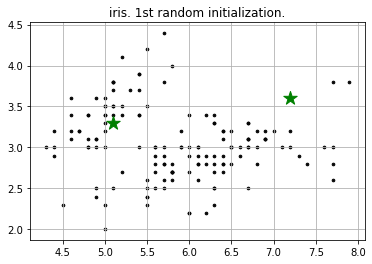

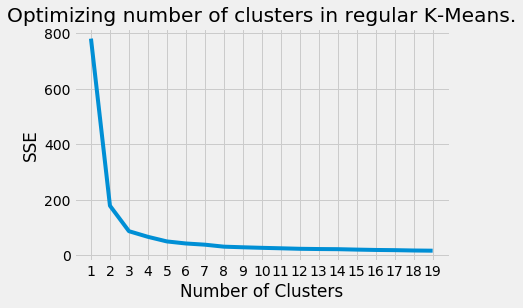

Optimal number:  3 



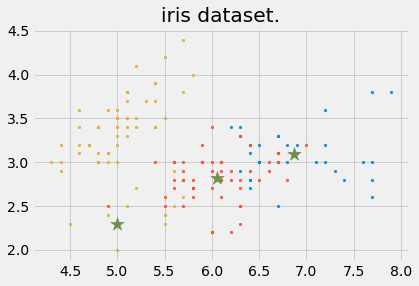


 - Modified k-means applied to  iris  dataset. 



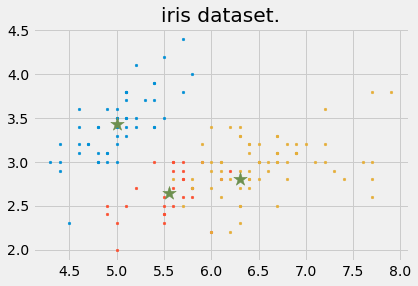

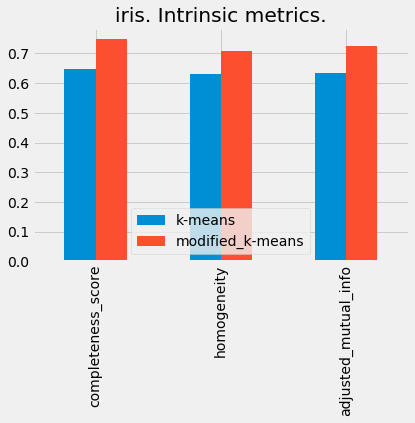

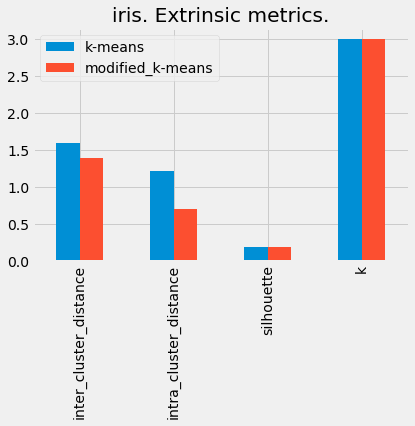

- Classic k-means applied to  wine  dataset. 



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0



 To visualize, lets preview  Index(['alcohol', 'malic_acid'], dtype='object') 



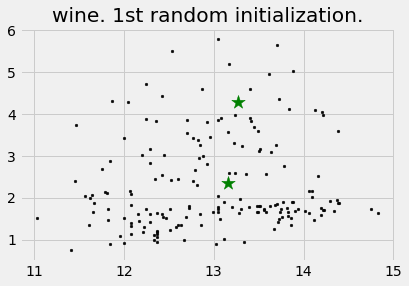

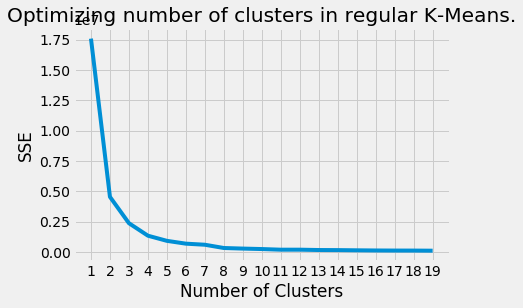

Optimal number:  4 



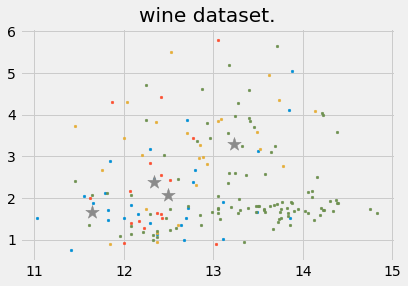


 - Modified k-means applied to  wine  dataset. 



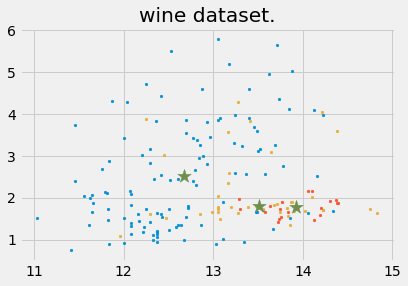

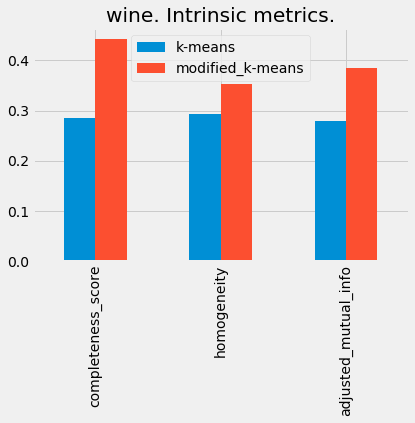

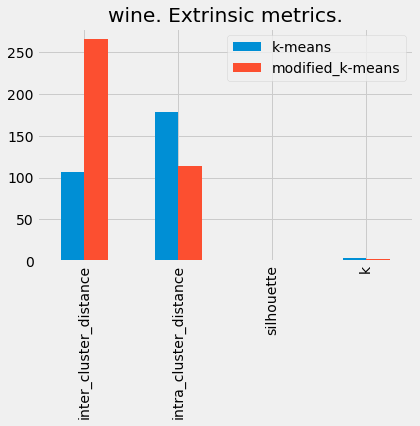

In [7]:
# Initializing variables.
k = 2
for d in datasets:    

    X=datasets[d]["data"]
    y=datasets[d]["target"]
    
    # Label  classes
    clusters = np.zeros(len(X))
    
    print("- Classic k-means applied to ",d, " dataset. \n")
    
    # let's have a clear view of the dataset:
    data = pd.DataFrame(data= np.c_[X, y],
                   columns= datasets[d]['feature_names'] + ['target'])
    display(data.head())
    print("\n To visualize, lets preview ", data.columns[:2],"\n")
    
    # we'll fit to just 2D for visual checkings
    f1=X[:,0]
    f2=X[:,1]
    
    # regular k-means
    C_new, clusters, inter_cluster_distance, intra_cluster_distance, k_elbow  = kmeans(d,k,X)    
    kmeans_metrics=int_ext_metrics(X,y,clusters,inter_cluster_distance, intra_cluster_distance,k_elbow)

    
    print("\n - Modified k-means applied to ",d, " dataset. \n")
    # mofified k-means
    C_new, clusters, inter_cluster_distance, intra_cluster_distance, k_optimized = modified_kmeans(d,X,k)
    modified_kmeans_metrics=int_ext_metrics(X,y,clusters,inter_cluster_distance, intra_cluster_distance,k_optimized )

    
    # displaying metrics
    df_metrics_intrinsic= pd.DataFrame({"k-means":kmeans_metrics[:3],
                            "modified_k-means":modified_kmeans_metrics[:3]},
                            index=["completeness_score","homogeneity","adjusted_mutual_info"]) # intrinsic metrics
    df_metrics_intrinsic.plot.bar(title=d+". Intrinsic metrics.") 
    
    # displaying metrics
    df_metrics_extrinsic= pd.DataFrame({"k-means":kmeans_metrics[3:],
                            "modified_k-means":modified_kmeans_metrics[3:]},
                            index=["inter_cluster_distance", "intra_cluster_distance" ,"silhouette","k"]) # extrinsic metrics
    df_metrics_extrinsic.plot.bar(title=d+". Extrinsic metrics.") 
    plt.show()

----------------------------

# Conclusions.

Most important result: **The improved model is still dependent of the first random initialization of centers.** The goodness of boths models are strongly dependent of this factor. 

Said that, and without the elbow method, the modified model performs better in terms of both intrinsic and extrinsic metrics.
Using the elbow method for regular k-means, its goodness competes with the improved one as it is shown above.

- Homogeneity: each cluster contains only members of a single class.

- Adjusted Mutual Information: The AMI returns a value of 1 when the two partitions are identical (ie perfectly matched). Random partitions (independent labellings) have an expected AMI around 0 on average hence can be negative.

- Completeness: all members of a given class are assigned to the same cluster.

- Intra and intercluster distance: The further are the centers between themselves (intercluster distance) and the closest are all elements of the same cluster (intracluster) distance, the better.

Intercluster distance tends to be higher and intracluster tends to be lower with the improved one, so we have extrinsic measurements telling us that maybe the modified one performs slightly better.

About the silhouette: Why is it the same for both models, taking into account that one  has more clusters than other? It puzzles me. This is what I am doing:

        mC = np.cov(Dx.transpose())
        Ma_mahalanobis = matriz_distancias(Dx, distancia_mahalanobis, mC)
        cluster.silhouette_score(Ma_mahalanobis, Dy)

- Translating:
    - Take the train set.
    - Calculate the Mahalanobis distance for their elements.
    - Calculate the silhouette score between the calculated mahalanobis distance, and the predicted clusters.
    
- At the end, the Silhouette Score is what it is, a score, and maybe the results between models are proportional, so we could say we do not have an extrinsic improvement with our modified model.

**Final conclusion:**


I think the modified model shows an improvement for the used datasets. Is it better for any dataset? Is it better for large volume of data? That question my friend, exceeds the duties of this assignment, but it could be something really interesting to study.

-------------------

![alt](https://i.pinimg.com/originals/87/e7/09/87e7098af41dad4e976193bf47de6974.jpg)

#### Alberto Vargas

------------------